# Importing Libraries

In [61]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Data Annotation (Label Encoding for classification column)

In [63]:
df = pd.read_csv('/kaggle/input/malware-detection/Malware dataset.csv')

In [64]:
label_encoder = LabelEncoder()
df['classification'] = label_encoder.fit_transform(df['classification'])

# Feature Engineering
# TF-IDF for text features

In [65]:
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
text_features = tfidf_vectorizer.fit_transform(df['hash']).toarray()

# Combine text features with numerical features

In [66]:
numerical_features = df.drop(['hash', 'classification'], axis=1)
X = pd.concat([pd.DataFrame(text_features), numerical_features], axis=1)
y = df['classification']

# Train-Test Split

In [67]:
y = y[:len(X)]
# Convert feature names to strings
X.columns = X.columns.astype(str)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Traditional ML Models

In [72]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier()
}

In [73]:
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    classification_report_result = classification_report(y_test, y_pred)
    print(f"{model_name} Model:")
    print(f"Accuracy: {accuracy}")
    print("Classification Report:\n", classification_report_result)

Logistic Regression Model:
Accuracy: 0.5152
Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.17      0.26     10030
           1       0.51      0.86      0.64      9970

    accuracy                           0.52     20000
   macro avg       0.53      0.52      0.45     20000
weighted avg       0.53      0.52      0.45     20000

Decision Tree Model:
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10030
           1       1.00      1.00      1.00      9970

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000

Random Forest Model:
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10030
           1       1.00      1.00      1.00      99

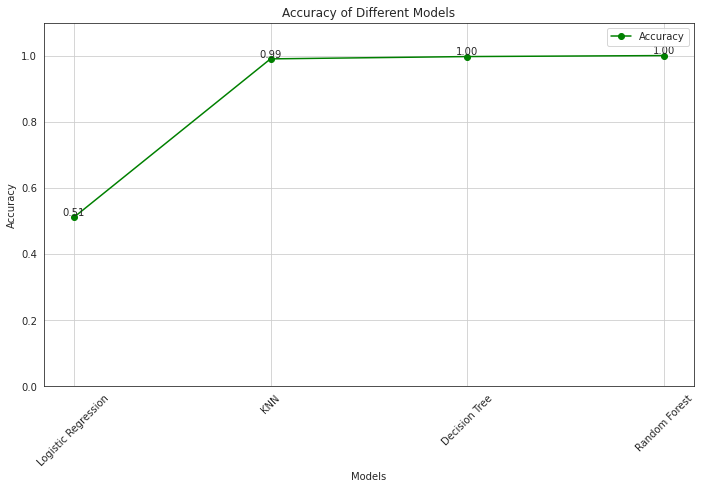

In [78]:
import matplotlib.pyplot as plt

# Accuracy scores for each model
model_names = ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest']
accuracies = [0.51, 0.99, 0.997, 1.0]  # Replace these with your actual accuracy scores

# Plotting the line graph
plt.figure(figsize=(10, 6))
plt.plot(model_names, accuracies, marker='o', linestyle='-', color='g', label='Accuracy')

# Adding labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.ylim(0, 1.1)

# Adding legends
plt.legend()

# Adding data labels
for i, acc in enumerate(accuracies):
    plt.text(i, acc, f'{acc:.2f}', ha='center', va='bottom')

# Show plot
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()


# Deep Learning Model

In [59]:
raw_data = pd.read_csv("/kaggle/input/malware-detection/Malware dataset.csv")
print(raw_data.shape)
raw_data.head()

(100000, 35)


,hash,millisecond,classification,state,usage_counter,prio,static_prio,normal_prio,policy,vm_pgoff,...,nivcsw,min_flt,maj_flt,fs_excl_counter,lock,utime,stime,gtime,cgtime,signal_nvcsw
0,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,0,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
1,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,1,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
2,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,2,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
3,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,3,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
4,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,4,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0


In [34]:
raw_data.columns

Index(['hash', 'millisecond', 'classification', 'state', 'usage_counter',
       'prio', 'static_prio', 'normal_prio', 'policy', 'vm_pgoff',
       'vm_truncate_count', 'task_size', 'cached_hole_size', 'free_area_cache',
       'mm_users', 'map_count', 'hiwater_rss', 'total_vm', 'shared_vm',
       'exec_vm', 'reserved_vm', 'nr_ptes', 'end_data', 'last_interval',
       'nvcsw', 'nivcsw', 'min_flt', 'maj_flt', 'fs_excl_counter', 'lock',
       'utime', 'stime', 'gtime', 'cgtime', 'signal_nvcsw'],
      dtype='object')

Based on the characteristics of the observations, the dataset was created in a Unix / Lunix-based
virtual machine for classification purposes, which are harmless with malware software for Android
devices. The data set consists of 100,000 observation data and 35 features. Below is a table of
specifications and descriptions.

| Features Description 	| Properties                                                      	|
|----------------------	|-----------------------------------------------------------------	|
| hash APK/ SHA256     	| file name                                                       	|
| milisecond           	| time                                                            	|
| classification       	| malware/beign                                                   	|
| state                	| flag of unrunable/runnable/stopped tasks                        	|
| usage_counter        	| task structure usage counter                                    	|
| prio                 	| keeps the dynamic priority of a process                         	|
| static_prio          	| static priority of a process                                    	|
| normal_prio          	| priority without taking RT-inheritance into account             	|
| policy               	| planning policy of the process                                  	|
| vm_pgoff             	| the offset of the area in the file, in pages.                   	|
| vm_truncate_count    	| used to mark a vma as now dealt with                            	|
| task_size            	| size of current task.                                           	|
| cached_hole_size     	| size of free address space hole.                                	|
| free_area_cache      	| first address space hole                                        	|
| mm_users             	| address space users                                             	|
| map_count            	| number of memory areas                                          	|
| hiwater_rss          	| peak of resident set size                                       	|
| total_vm             	| total number of pages                                           	|
| shared_vm            	| number of shared pages.                                         	|
| exec_vm              	| number of executable pages.                                     	|
| reserved_vm          	| number of reserved pages.                                       	|
| nr_ptes              	| number of page table entries                                    	|
| end_data             	| end address of code component                                   	|
| last_interval        	| last interval time before thrashing                             	|
| nvcsw                	| number of volunteer context switches.                           	|
| nivcsw               	| number of in-volunteer context switches                         	|
| min_flt              	| minör page faults                                               	|
| maj_flt              	| majör page faults                                               	|
| fs_excl_counter      	| ıt holds file system exclusive resources.                       	|
| lock                 	| the read-write synchronization lock used for file system access 	|
| utime                	| user time                                                       	|
| stime                	| system time                                                     	|
| gtime                	| guest time                                                      	|
| cgtime               	| cumulative group time. Cumulative resource counter              	|
| signal_nvcsw         	| used as cumulative resource counter.                            	|


In [35]:
# read some statistics of the dataset
raw_data.describe(include="all")

,hash,millisecond,classification,state,usage_counter,prio,static_prio,normal_prio,policy,vm_pgoff,...,nivcsw,min_flt,maj_flt,fs_excl_counter,lock,utime,stime,gtime,cgtime,signal_nvcsw
count,100000,100000.000000,100000,1.000000e+05,100000.0,1.000000e+05,100000.000000,100000.0,100000.0,100000.0,...,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.00000,100000.0,100000.0
unique,100,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,audio.mp3.music.player.apk,NaN,benign,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1000,NaN,50000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,499.500000,NaN,1.577683e+05,0.0,3.069706e+09,18183.900070,0.0,0.0,0.0,...,32.991160,2.053130,117.920240,1.109190,3.204448e+09,385415.451970,4.059310,1.66142,0.0,0.0
std,NaN,288.676434,NaN,9.361726e+05,0.0,2.963061e+05,4609.792765,0.0,0.0,0.0,...,52.730176,13.881382,3.116892,2.160466,0.000000e+00,10144.036494,0.822848,3.26304,0.0,0.0
min,NaN,0.000000,NaN,0.000000e+00,0.0,3.069190e+09,13988.000000,0.0,0.0,0.0,...,0.000000,0.000000,112.000000,0.000000,3.204448e+09,371782.000000,3.000000,0.00000,0.0,0.0
25%,NaN,249.750000,NaN,0.000000e+00,0.0,3.069446e+09,14352.000000,0.0,0.0,0.0,...,1.000000,0.000000,114.000000,0.000000,3.204448e+09,378208.000000,3.000000,0.00000,0.0,0.0
50%,NaN,499.500000,NaN,0.000000e+00,0.0,3.069698e+09,16159.000000,0.0,0.0,0.0,...,9.000000,1.000000,120.000000,0.000000,3.204448e+09,383637.000000,4.000000,0.00000,0.0,0.0
75%,NaN,749.250000,NaN,4.096000e+03,0.0,3.069957e+09,22182.000000,0.0,0.0,0.0,...,46.000000,1.000000,120.000000,1.000000,3.204448e+09,390324.000000,5.000000,1.00000,0.0,0.0


In [36]:
# Check the DataType of our dataset
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 35 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   hash               100000 non-null  object
 1   millisecond        100000 non-null  int64 
 2   classification     100000 non-null  object
 3   state              100000 non-null  int64 
 4   usage_counter      100000 non-null  int64 
 5   prio               100000 non-null  int64 
 6   static_prio        100000 non-null  int64 
 7   normal_prio        100000 non-null  int64 
 8   policy             100000 non-null  int64 
 9   vm_pgoff           100000 non-null  int64 
 10  vm_truncate_count  100000 non-null  int64 
 11  task_size          100000 non-null  int64 
 12  cached_hole_size   100000 non-null  int64 
 13  free_area_cache    100000 non-null  int64 
 14  mm_users           100000 non-null  int64 
 15  map_count          100000 non-null  int64 
 16  hiwater_rss        10

The data is already clean.

In [37]:
#Start Processing
data = raw_data

In [38]:
data["classification"].value_counts()

benign     50000
malware    50000
Name: classification, dtype: int64

In [39]:
data['classification'] = data.classification.map({'benign':0, 'malware':1})
data.head()

,hash,millisecond,classification,state,usage_counter,prio,static_prio,normal_prio,policy,vm_pgoff,...,nivcsw,min_flt,maj_flt,fs_excl_counter,lock,utime,stime,gtime,cgtime,signal_nvcsw
0,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,0,1,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
1,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,1,1,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
2,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,2,1,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
3,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,3,1,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
4,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,4,1,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0


In [40]:
# Shuffle data
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,hash,millisecond,classification,state,usage_counter,prio,static_prio,normal_prio,policy,vm_pgoff,...,nivcsw,min_flt,maj_flt,fs_excl_counter,lock,utime,stime,gtime,cgtime,signal_nvcsw
0,45fa7d84f5d36ceff44ff870cb10d86997e34e38bbdfc1...,204,1,0,0,3070181376,14042,0,0,0,...,0,1,120,0,3204448256,371823,3,0,0,0
1,com.venticake.retrica.apk,925,0,0,0,3069575168,16856,0,0,0,...,10,1,120,0,3204448256,390533,5,2,0,0
2,com.epocrates.apk,399,0,0,0,3069526016,24475,0,0,0,...,5,2,114,0,3204448256,387447,4,0,0,0
3,com.sonypicturestelevision.sportsjeopardy.apk,721,0,0,0,3069784064,19573,0,0,0,...,172,1,120,2,3204448256,388109,4,5,0,0
4,68366d9e4a9099fa88f733dad4f5e1731e22cedfe7742c...,769,1,1007616,0,3070214144,14164,0,0,0,...,5,1,120,1,3204448256,376718,4,1,0,0


In [41]:
#Import drawing tools

import matplotlib.pyplot as plt
import seaborn as sns

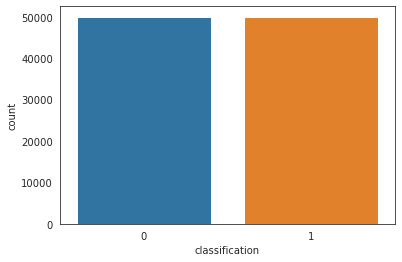

In [42]:
sns.countplot(data["classification"])
plt.show()

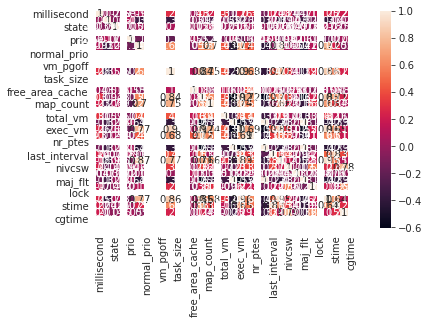

In [43]:
corrMatrix = data.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [44]:
X = data.drop(["hash","classification",'vm_truncate_count','shared_vm','exec_vm','nvcsw','maj_flt','utime'],axis=1)
Y = data["classification"]

In [45]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=1)

Before we feed to a NN, we need to normalize the data

In [46]:
# Data normalization

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [47]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [48]:
import tensorflow as tf

In [49]:
#Number of attributes
input_size = 27 

#Number of Outputs
output_size = 2 

# Use same hidden layer size for both hidden layers. Not a necessity.
hidden_layer_size = 256
    
# define how the model will look like
model = tf.keras.Sequential([
    tf.keras.layers.Dense(hidden_layer_size, input_shape=(input_size,), activation='tanh'), # 1st hidden layer
    tf.keras.layers.Dense(hidden_layer_size, activation='tanh'),
    tf.keras.layers.Dense(hidden_layer_size, activation='tanh'),
    tf.keras.layers.Dense(hidden_layer_size, activation='tanh'),
    tf.keras.layers.Dense(hidden_layer_size, activation='tanh'),
    tf.keras.layers.Dense(hidden_layer_size, activation='tanh'),
    tf.keras.layers.Dense(output_size, activation='softmax') # output layer
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 256)               7168      
_________________________________________________________________
dense_8 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_9 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_10 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_11 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_12 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_13 (Dense)             (None, 2)                

In [50]:
# from sklearn.metrics import precision_score, recall_score, f1_score

# # Define custom metric functions
# def precision_metric(y_true, y_pred):
#     return precision_score(y_true, y_pred, average='weighted')

# def recall_metric(y_true, y_pred):
#     return recall_score(y_true, y_pred, average='weighted')

# def f1_metric(y_true, y_pred):
#     return f1_score(y_true, y_pred, average='weighted')

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#from keras.optimizers import SGD
#opt = SGD(lr=0.01)
#sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
#model.compile(optimizer = sgd, loss = "sparse_categorical_crossentropy", metrics=['accuracy'])

In [51]:
# set the batch size
batch_size = 200

# set a maximum number of training epochs
max_epochs = 25

# set an early stopping mechanism
# let's set patience=2, to be a bit tolerant against random validation loss increases
early_stopping = tf.keras.callbacks.EarlyStopping(patience=2)

In [52]:
result = model.fit(x=x_train,
                   y=y_train,
                   batch_size=batch_size,
                   epochs=max_epochs,
                   verbose=1,
#                    callbacks=[early_stopping],
                   validation_split=0.2)


Epoch 1/25
320/320 [==============================] - 1s 2ms/step - loss: 0.0970 - accuracy: 0.9646 - val_loss: 0.0121 - val_accuracy: 0.9964
Epoch 2/25
320/320 [==============================] - 1s 2ms/step - loss: 0.0193 - accuracy: 0.9938 - val_loss: 0.0049 - val_accuracy: 0.9989
Epoch 3/25
320/320 [==============================] - 1s 2ms/step - loss: 0.0071 - accuracy: 0.9976 - val_loss: 0.0085 - val_accuracy: 0.9977
Epoch 4/25
320/320 [==============================] - 1s 2ms/step - loss: 0.0068 - accuracy: 0.9979 - val_loss: 0.0027 - val_accuracy: 0.9991
Epoch 5/25
320/320 [==============================] - 1s 2ms/step - loss: 0.0026 - accuracy: 0.9992 - val_loss: 0.0030 - val_accuracy: 0.9995
Epoch 6/25
320/320 [==============================] - 1s 2ms/step - loss: 0.0277 - accuracy: 0.9919 - val_loss: 0.0033 - val_accuracy: 0.9992
Epoch 7/25
320/320 [==============================] - 1s 2ms/step - loss: 0.0064 - accuracy: 0.9982 - val_loss: 9.3094e-04 - val_accuracy: 0.9998
Ep

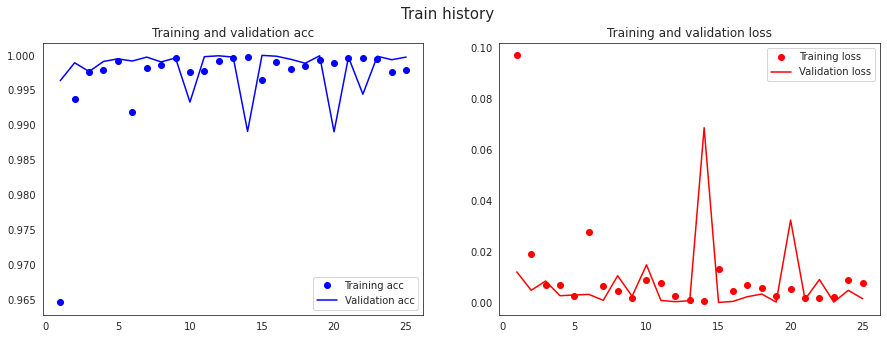

In [54]:
# Visualize the result
acc = result.history['accuracy']
val_acc = result.history['val_accuracy']
loss = result.history['loss']
val_loss = result.history['val_loss']

epochs = range(1, len(acc) + 1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
sns.set_style("white")
plt.suptitle('Train history', size = 15)

ax1.plot(epochs, acc, "bo", label = "Training acc")
ax1.plot(epochs, val_acc, "b", label = "Validation acc")
ax1.set_title("Training and validation acc")
ax1.legend()

ax2.plot(epochs, loss, "bo", label = "Training loss", color = 'red')
ax2.plot(epochs, val_loss, "b", label = "Validation loss", color = 'red')
ax2.set_title("Training and validation loss")
ax2.legend()

plt.show()

In [55]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)

print('\nTest loss: {0:.6f}. Test accuracy: {1:.6f}%'.format(test_loss, test_accuracy*100.))

625/625 [==============================] - 1s 2ms/step - loss: 0.0010 - accuracy: 0.9999

Test loss: 0.001013. Test accuracy: 99.989998%


Further train the model using SGD with lr=0.001

In [56]:
from keras.optimizers import SGD
sgd = SGD(lr=0.01)
model.compile(optimizer = sgd, loss = "sparse_categorical_crossentropy", metrics=['accuracy'])

In [57]:
result = model.fit(x=x_train,
                   y=y_train,
                   batch_size=batch_size,
                   epochs=30,
                   verbose=1,
                   initial_epoch=20, #start from epoch 11
                   callbacks=[early_stopping], #prevent overfitting
                   validation_split=0.2)

Epoch 21/30
320/320 [==============================] - 1s 2ms/step - loss: 0.0011 - accuracy: 0.9998 - val_loss: 7.8004e-04 - val_accuracy: 0.9999
Epoch 22/30
320/320 [==============================] - 1s 2ms/step - loss: 7.0606e-04 - accuracy: 0.9999 - val_loss: 5.7843e-04 - val_accuracy: 0.9999
Epoch 23/30
320/320 [==============================] - 1s 2ms/step - loss: 6.5487e-04 - accuracy: 0.9999 - val_loss: 3.6882e-04 - val_accuracy: 0.9999
Epoch 24/30
320/320 [==============================] - 1s 2ms/step - loss: 6.0890e-04 - accuracy: 0.9999 - val_loss: 2.5198e-04 - val_accuracy: 0.9999
Epoch 25/30
320/320 [==============================] - 1s 2ms/step - loss: 4.9859e-04 - accuracy: 1.0000 - val_loss: 1.9318e-04 - val_accuracy: 0.9999
Epoch 26/30
320/320 [==============================] - 1s 2ms/step - loss: 4.6163e-04 - accuracy: 1.0000 - val_loss: 1.7368e-04 - val_accuracy: 0.9999
Epoch 27/30
320/320 [==============================] - 1s 2ms/step - loss: 4.5300e-04 - accuracy: 

In [58]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)

print('\nTest loss: {0:.6f}. Test accuracy: {1:.6f}%'.format(test_loss, test_accuracy*100.))

625/625 [==============================] - 1s 2ms/step - loss: 2.2032e-04 - accuracy: 0.9999

Test loss: 0.000220. Test accuracy: 99.994999%
